# Energy production from 1970 to 2010

We investigate the energy production data provided by 

https://www.gapminder.org/data/

********************
To answer the following questions:

What is energy production geografically distributed between 1970 and 2010?

What is the role that oil and gas play?

What are the time series of the energy production between 1970 and 2010?


********************

## Data


**Energy production, total**

Description: Energy production refers to forms of primary energy petroleum (crude oil, natural gas liquids, and 
Oil from nonconventional sources), natural gas, solid fuels (coal, lignite and other derived fuels), and combustible 
renewables and waste— and primary electricity, all converted into tonnes of oil equivalents, counted in tonnes 
of oil equivalent (thousand of tonnes oil equivalent).

https://data.worldbank.org/indicator/EG.EGY.PROD.KT.OE

**Oil production, total**

Description: Total amount of crude oil production (tonnes oil equivalent)

https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html


**Natural gas production, total**

Description: Natural gas production (tonnes oil equivalent)

https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html



## Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df_total = pd.read_csv('energy_production_total.csv', index_col='country')*1000 # The 1000 unit conversion into toe (tonnes of oil equivalent)
df_oil = pd.read_csv('oil_production_total.csv', index_col='country')
df_gas = pd.read_csv('natural_gas_production_total.csv', index_col='country')
#df_hydro = pd.read_csv('hydro_power_generation_total.csv', index_col='country')
#df_nuclear = pd.read_csv('nuclear_power_generation_total.csv', index_col='country')

In [3]:
# All notebooks follow this pattern, missing values correspont to early years and year 2010.
df_total.head(2)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,883000.0,959000.0,1050000.0,1150000.0,1170000.0,1190000.0,1060000.0,1150000.0,1250000.0,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,137000000.0,143000000.0,155000000.0,158000000.0,167000000.0,165000000.0,164000000.0,162000000.0,152000000.0,NaN


### Inspecting missing values

In [4]:
# Most total energy data has only 7 missing values
frame=df_total
frame.isnull().sum(axis=1).describe(), frame.columns[0], frame.columns[-1]

(count    133.000000
 mean      13.593985
 std       10.249196
 min        0.000000
 25%       12.000000
 50%       12.000000
 75%       12.000000
 max       43.000000
 dtype: float64, '1960', '2010')

In [5]:
# Most gas energy data has only 6 missing values
frame=df_gas
frame.isnull().sum(axis=1).describe(), frame.columns[0], frame.columns[-1]

(count    49.000000
 mean      3.857143
 std       7.547074
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       6.000000
 max      39.000000
 dtype: float64, '1970', '2016')

In [6]:
# Most oil energy data has only 7 missing values
frame=df_oil
frame.isnull().sum(axis=1).describe(), frame.columns[0], frame.columns[-1]

(count    49.000000
 mean      6.489796
 std      11.530977
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       7.000000
 max      47.000000
 dtype: float64, '1965', '2016')

**Insights:**

1. All data frame have data from 1965 till 2010
2. Most missing data (>75%) occurs before 1972

### Wrangling and handling missing values

In [7]:
# In view of the above observations we are going to focus on studying the following values
bin_edges = [1974+3*i for i in range(13)]
bin_names = [str(i)[-2:]+'-'+str(i+2)[-2:] for i in bin_edges[:-1]]
bin_names

['74-76',
 '77-79',
 '80-82',
 '83-85',
 '86-88',
 '89-91',
 '92-94',
 '95-97',
 '98-00',
 '01-03',
 '04-06',
 '07-09']

In [8]:
def wrangle_handle_missing(df):
    
    aux = df.rename(columns=lambda x: int(x)) # numeric column names    
    aux=aux.T # exchange rows and columns
    aux=aux.rename(columns=lambda x: x.strip().lower().replace(" ", "_")) #uniform names convention
    
    aux = aux.reset_index().rename(columns = {'index': 'year'}) # reset index, rename year
    aux['period'] = pd.cut(aux['year'], bin_edges, labels=bin_names) # create bin years
    aux=aux.groupby('period').sum().drop(columns=['year']) # group by energy on bin years    
    if aux.isnull().sum().sum() != 0: print('There are missing values') #check there are not NaNs
        
    return aux

In [9]:
df_total = wrangle_handle_missing(df_total)
df_oil = wrangle_handle_missing(df_oil)
df_gas = wrangle_handle_missing(df_gas)

In [10]:
cols = df_total.sum(0).sort_values(ascending=False).index # Countries order according to total production

df_total = df_total.reindex(cols, axis=1) # Sort columns according to cols list
df_oil = df_oil.reindex(cols, axis=1) # Sort columns according to cols list
df_gas = df_gas.reindex(cols, axis=1) # Sort columns according to cols list

In [11]:
# Some countries were funded recently, hence their missing values appear before 1990ish
df_total.head(6)

country,united_states,china,russia,saudi_arabia,canada,india,iran,united_kingdom,mexico,indonesia,...,armenia,eritrea,lebanon,jordan,namibia,luxembourg,moldova,cyprus,singapore,malta
period,,,,,,,,,,,,,,,,,,,,,
74-76,4.280000e+09,1.565000e+09,0.000000e+00,1.284000e+09,560000000.0,510000000.0,899000000.0,397000000.0,210100000.0,318300000.0,...,0.0,0.0,534000.0,2794.0,0.0,34370.0,0.0,22120.0,0.0,0.0
77-79,4.550000e+09,1.839000e+09,0.000000e+00,1.468000e+09,608000000.0,546000000.0,529800000.0,558000000.0,356000000.0,368000000.0,...,0.0,0.0,534000.0,2079.0,0.0,79700.0,0.0,22840.0,0.0,0.0
80-82,4.550000e+09,1.919000e+09,0.000000e+00,1.176000e+09,611000000.0,633000000.0,342400000.0,662000000.0,560000000.0,361000000.0,...,0.0,0.0,489000.0,3032.0,0.0,87400.0,0.0,17820.0,0.0,0.0
83-85,4.720000e+09,2.224000e+09,0.000000e+00,7.510000e+08,710000000.0,723000000.0,345000000.0,690000000.0,570000000.0,401000000.0,...,0.0,0.0,463000.0,19040.0,0.0,87700.0,0.0,20080.0,0.0,0.0
86-88,4.830000e+09,2.462000e+09,0.000000e+00,8.470000e+08,800000000.0,814000000.0,414000000.0,685000000.0,572000000.0,426000000.0,...,0.0,0.0,464000.0,98200.0,0.0,105400.0,0.0,18540.0,0.0,0.0
89-91,4.940000e+09,2.693000e+09,3.650000e+09,1.316000e+09,853000000.0,900000000.0,577000000.0,638000000.0,599000000.0,540000000.0,...,535000.0,708000.0,461000.0,492000.0,429000.0,104900.0,181800.0,17170.0,0.0,0.0


In [12]:
def handling_new_countries(df_0):  
    df= df_0[df_0!=0] # replacing 0's with NaNs
    for i in df.columns:
        aux = df[i].min() 
        df[i].fillna(aux, inplace=True) # replacing NaNs with country min
    return df

In [13]:
df_total = handling_new_countries(df_total)
df_oil = handling_new_countries(df_oil)
df_gas = handling_new_countries(df_gas)

In [14]:
df_oil.head()

country,united_states,china,russia,saudi_arabia,canada,india,iran,united_kingdom,mexico,indonesia,...,armenia,eritrea,lebanon,jordan,namibia,luxembourg,moldova,cyprus,singapore,malta
period,,,,,,,,,,,,,,,,,,,,,
74-76,1.391000e+09,257900000.0,9.140000e+08,1.264000e+09,232500000.0,27140000.0,852000000.0,52070000.0,139400000.0,226900000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77-79,1.441000e+09,316000000.0,9.140000e+08,1.422000e+09,244800000.0,33500000.0,499200000.0,212400000.0,254400000.0,240600000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80-82,1.443000e+09,309000000.0,9.140000e+08,1.086000e+09,228600000.0,60300000.0,309200000.0,307500000.0,426000000.0,217300000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83-85,1.477000e+09,371000000.0,1.103000e+09,6.440000e+08,255200000.0,90000000.0,316000000.0,381000000.0,431000000.0,211600000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86-88,1.355000e+09,409000000.0,1.690000e+09,7.690000e+08,278000000.0,97400000.0,378000000.0,328700000.0,429000000.0,208700000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merging

In [15]:
aux=df_total 
aux['energy_source']= ['total']* len(aux)
df_total=aux.set_index('energy_source',append=True)

In [16]:
aux=df_oil
aux['energy_source']= ['oil']* len(aux)
df_oil=aux.set_index('energy_source',append=True)

In [17]:
aux=df_gas
aux['energy_source']= ['gas']* len(aux)
df_gas=aux.set_index('energy_source',append=True)

In [18]:
df_total = df_total.reset_index().set_index(['energy_source','period'],  drop=True) 
df_oil = df_oil.reset_index().set_index(['energy_source','period'],  drop=True) 
df_gas = df_gas.reset_index().set_index(['energy_source','period'],  drop=True) 

In [19]:
df = df_total.append([df_oil,df_gas])

In [20]:
#Example of handling
df.united_kingdom.loc[('total')]

period
74-76    397000000.0
77-79    558000000.0
80-82    662000000.0
83-85    690000000.0
86-88    685000000.0
89-91    638000000.0
92-94    726000000.0
95-97    809000000.0
98-00    817000000.0
01-03    731000000.0
04-06    569000000.0
07-09    476000000.0
Name: united_kingdom, dtype: float64

# Analysis

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

### Distribution of the total production of energy in the period 1974-2009

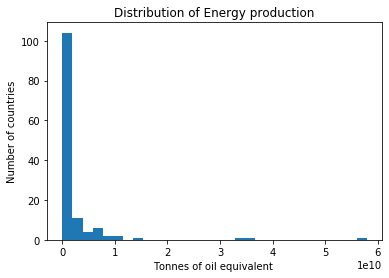

In [22]:
plt.hist(df.loc[('total')].sum(axis=0) , bins= 30);
plt.title("Distribution of Energy production")
plt.xlabel("Tonnes of oil equivalent ")
plt.ylabel("Number of countries");

**The distribution is very left skewed, i.e. few countries produce > 1e10 toe (tonnes of oil equivalent)**

In [23]:
# Total energy percentage produced by each country between 1974 adn 2009
total_percentage = (df.loc[('total')].sum(axis=0)/ df.loc[('total')].sum(axis=0).sum()*100)

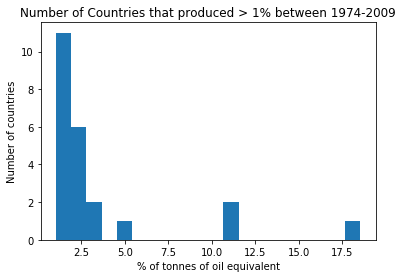

In [24]:
plt.hist(total_percentage[total_percentage>1] , bins= 20);
plt.title("Number of Countries that produced > 1% between 1974-2009")
plt.xlabel("% of tonnes of oil equivalent")
plt.ylabel("Number of countries");

**Again, the conditional distribution > 1% is left skewed. Incredible 3 countries produced 
1/3 of the energy bettween 1974-2009** 

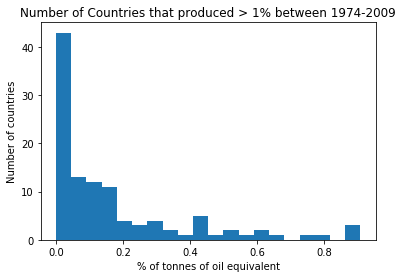

In [25]:
plt.hist(total_percentage[total_percentage<1] , bins= 20);
plt.title("Number of Countries that produced > 1% between 1974-2009")
plt.xlabel("% of tonnes of oil equivalent")
plt.ylabel("Number of countries");

**Again, the conditional distribution < 1% is left skewed** 

**Conclusion the number of production of energy has a left skewed distribution, it would make sense to 
try fitted to an exponential distribution**


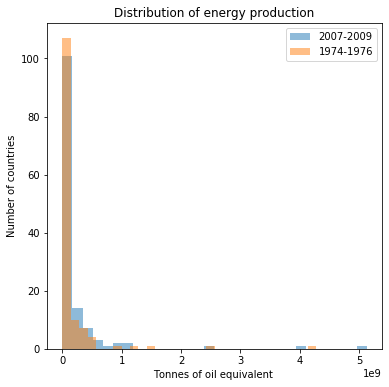

In [26]:
# Let us look at the period 1974-1976 and pediod 2007-2009
fig, ax = plt.subplots(figsize=(6, 6))
plt.hist(df.loc[('total','07-09')] , bins= 30, alpha=0.5);
plt.hist(df.loc[('total','74-76')] , bins= 30, alpha=0.5);
ax.legend([ "2007-2009","1974-1976"]);

plt.title("Distribution of energy production")
plt.xlabel("Tonnes of oil equivalent ")
plt.ylabel("Number of countries");

**This plot tell us that the left skewness is present in both periods, but the details of the distribution might vary over time**

### Top five countries that produced more energy

In [27]:
#Between 1974-1976
df.loc[('total', '74-76')].sort_values(ascending = False)[:5]

country
united_states    4.280000e+09
russia           2.430000e+09
china            1.565000e+09
saudi_arabia     1.284000e+09
iran             8.990000e+08
Name: (total, 74-76), dtype: float64

In [28]:
#Between 2007-2009
df.loc[('total', '07-09')].sort_values(ascending = False)[:5]

country
united_states    5.130000e+09
china            4.080000e+09
russia           2.430000e+09
canada           1.192000e+09
saudi_arabia     1.107000e+09
Name: (total, 07-09), dtype: float64

In [29]:
#Between 2007-2009
df.loc[('total')].sum(axis=0).sort_values(ascending = False)[:10]

country
united_states     5.789000e+10
china             3.543500e+10
russia            3.404700e+10
saudi_arabia      1.538800e+10
canada            1.093600e+10
india             1.071400e+10
iran              7.783200e+09
united_kingdom    7.758000e+09
mexico            6.931100e+09
indonesia         6.796300e+09
dtype: float64

**5 numbers statistics statistics**

In [30]:
df.loc[('total', '74-76')].sort_values(ascending = False).describe()

count    1.330000e+02
mean     1.447978e+08
std      4.669321e+08
min      9.550000e+02
25%      4.400000e+06
50%      1.906000e+07
75%      6.520000e+07
max      4.280000e+09
Name: (total, 74-76), dtype: float64

In [31]:
df.loc[('total', '07-09')].sort_values(ascending = False).describe()

count    1.330000e+02
mean     2.130514e+08
std      6.244945e+08
min      1.977000e+03
25%      8.060000e+06
50%      3.380000e+07
75%      1.582000e+08
max      5.130000e+09
Name: (total, 07-09), dtype: float64

**Insights about differences betweent the energy production in '74-76' and in '07-09'
: mean,std max, 75, 50 quantiles have increased by a factor <10 while the min and 25 decressed**

# About the roles of oil and gas

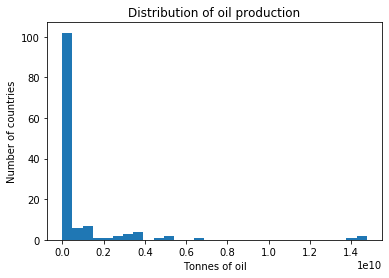

In [32]:
plt.hist(df.loc[('oil')].sum(axis=0) , bins= 30);
plt.title("Distribution of oil production")
plt.xlabel("Tonnes of oil")
plt.ylabel("Number of countries");

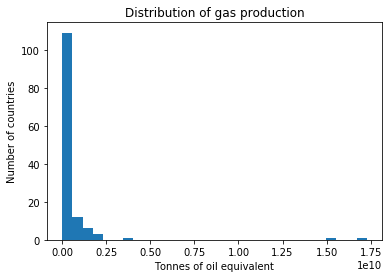

In [33]:
plt.hist(df.loc[('gas')].sum(axis=0) , bins= 30);
plt.title("Distribution of gas production")
plt.xlabel("Tonnes of oil equivalent")
plt.ylabel("Number of countries");

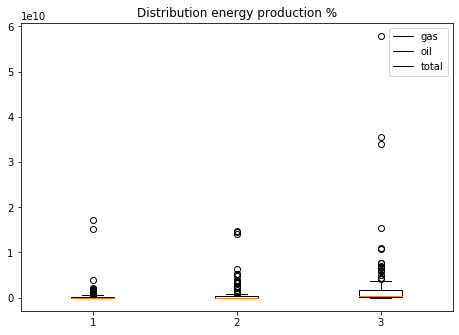

In [34]:
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot([df.loc[('gas')].sum(axis=0), df.loc[('oil')].sum(axis=0), df.loc[('total')].sum(axis=0)  ])
plt.title("Distribution energy production %")
ax.legend([ "gas","oil","total"]);

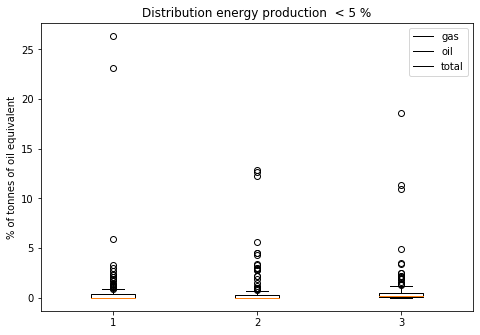

In [35]:
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot([df.loc[('gas')].sum(axis=0)/(df.loc[('gas')].sum(axis=0).sum())*100, 
                 df.loc[('oil')].sum(axis=0)/(df.loc[('oil')].sum(axis=0).sum())*100, 
                 df.loc[('total')].sum(axis=0)/(df.loc[('total')].sum(axis=0).sum())*100])

ax.legend([ "gas","oil","total"]);
plt.title("Distribution energy production  < 5 %")
plt.ylabel("% of tonnes of oil equivalent");

**These box plot further show us visually how left skew the distributions actually are.**

In [36]:
df.loc[('total')].sum(axis=0).sort_values(ascending = False)[:10]

country
united_states     5.789000e+10
china             3.543500e+10
russia            3.404700e+10
saudi_arabia      1.538800e+10
canada            1.093600e+10
india             1.071400e+10
iran              7.783200e+09
united_kingdom    7.758000e+09
mexico            6.931100e+09
indonesia         6.796300e+09
dtype: float64

In [37]:
df.loc[('oil')].sum(axis=0).sort_values(ascending = False)[:10]

country
saudi_arabia            1.474600e+10
united_states           1.458100e+10
russia                  1.403200e+10
iran                    6.403400e+09
mexico                  5.150800e+09
china                   5.134900e+09
venezuela               4.904300e+09
canada                  3.908300e+09
united_arab_emirates    3.784500e+09
nigeria                 3.474000e+09
dtype: float64

In [38]:
df.loc[('gas')].sum(axis=0).sort_values(ascending = False)[:10]

country
united_states     1.727400e+10
russia            1.513500e+10
canada            3.854800e+09
netherlands       2.166700e+09
united_kingdom    1.991300e+09
algeria           1.739040e+09
indonesia         1.557000e+09
iran              1.494770e+09
turkmenistan      1.398600e+09
norway            1.373290e+09
dtype: float64

# Energy production time

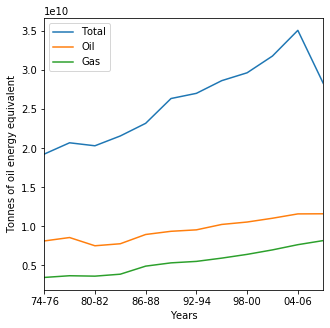

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
df.sum(axis=1)['total'].plot()
df.sum(axis=1)['oil'].plot()
df.sum(axis=1)['gas'].plot()
ax.legend([ "Total","Oil","Gas"]);
plt.xlabel("Years")
plt.ylabel("Tonnes of oil energy equivalent");

- **Un/Surprinsinly, up to fluctuations araound 1984, the energy production of oil and gas of oil and gas has not stop.**

- **Actually most energy produced does not only come from oil/gas. A pending question is what other sources produce significant energy.**

- **It would be interesting to answer why the global energy production declined from 2007-2009.**

- **The total energy production is clearly correlated with the gas and oil energy production**

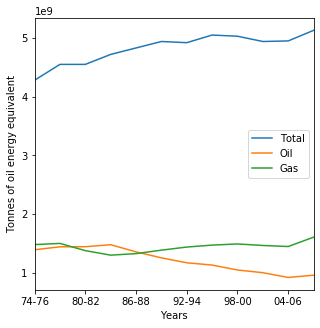

In [40]:
fig, ax = plt.subplots(figsize=(5, 5))
df.united_states['total'].plot()
df.united_states['oil'].plot()
df.united_states['gas'].plot()
ax.legend([ "Total","Oil","Gas"]);
plt.xlabel("Years")
plt.ylabel("Tonnes of oil energy equivalent");

**USA energy production is the largest in the world yet the oil produciton has been declining and the gas production 
has not significantly increased over time.**

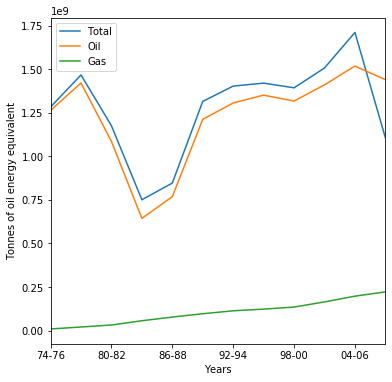

In [41]:
fig, ax = plt.subplots(figsize=(6, 6))
df.saudi_arabia['total'].plot()
df.saudi_arabia['oil'].plot()
df.saudi_arabia['gas'].plot()
ax.legend([ "Total","Oil","Gas"]);
plt.xlabel("Years")
plt.ylabel("Tonnes of oil energy equivalent");

**Saudia Arabia energy production almost entirely comes from Oil, and more recently from gas. No wonder why they don't care about climate change**

## Summary of tentative discoveries

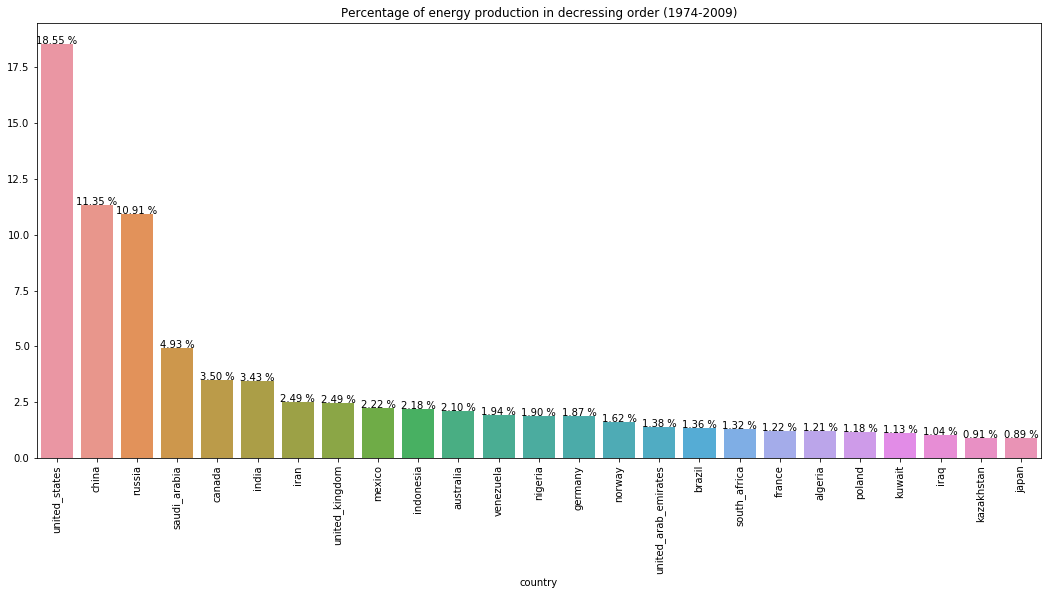

In [45]:
cols= total_percentage.sort_values(ascending=False)[:25];

fig = plt.figure(figsize=(18,8))
ax = sns.barplot(cols.index, cols.values);
ax.set_title('Percentage of energy production in decressing order (1974-2009)')

for p in ax.patches:
    height = p.get_height();
    ax.text(p.get_x()+p.get_width()/2.,height ,'{:1.2f} %'.format(height), ha="center");
    
plt.xticks( rotation='vertical');

**This bat plot showing the total energy about 50 % of the global energy is produced by 10 countries. 
In fact above we further showed that the distribution of energy production is highly left skewed.**

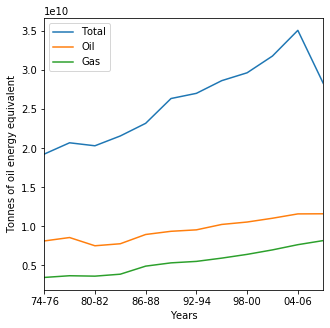

In [43]:
fig, ax = plt.subplots(figsize=(5, 5))
df.sum(axis=1)['total'].plot()
df.sum(axis=1)['oil'].plot()
df.sum(axis=1)['gas'].plot()
ax.legend([ "Total","Oil","Gas"]);
plt.xlabel("Years")
plt.ylabel("Tonnes of oil energy equivalent");